In [1]:
import os

import torch
import torchvision
from torchvision.transforms import v2
import matplotlib.pyplot as plt
import numpy as np

from starter_cell_classifier import do_train, YoloClsDataset, ResizeByLarger, SquarePad, MobileNetV3Classifier, make_transforms


e:\IT\pet\airport-boardgame-detection\venv_win\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def imread_torch(filepath):
    "# uint 0..255"
    return torchvision.io.read_image(filepath)

def imshow_torch(img, figsize=(4, 4)):
    img = img.detach().cpu().numpy()
    img = img.transpose((1, 2, 0))

    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(img)
    plt.show()

def imshow_torch_batch(images, titles):
    assert len(images) == len(titles)

    max_ncols = 8
    nimgs = len(images)
    ncols = min(nimgs, max_ncols)
    nrows = nimgs // max_ncols + bool(nimgs % max_ncols)

    plt.figure(figsize=(2 * ncols, 2 * nrows))

    for index in range(nimgs):
        i = index // ncols
        j = index - i * ncols
    
        index = i * ncols + j
        image = images[index]
        title = titles[index]

        image_np = image.detach().cpu().numpy()
        image_np = image_np.transpose((1, 2, 0))

        plt.subplot(nrows, ncols, 1 + index)
        plt.title(title)
        plt.axis('off')

        plt.imshow(image_np, aspect='auto')
    plt.subplots_adjust(hspace=0.2, wspace=0.02)
    plt.show()


In [3]:
class ResizeByLarger(torch.nn.Module):
    def __init__(self, size=96):
        self.size = size

    def __call__(self, img):
        c, h, w = img.shape
        assert c == 3

        r = self.size / max(h, w)
        img = v2.functional.resize(
            img,
            [(round(min(self.size, r * h))), round(min(self.size, r * w))]
        )

        return img

In [4]:
train_transform, val_transform = make_transforms()

In [5]:
working_directory = '.'
dataset_path = os.path.join(working_directory, '../../data/datasets/starter-cell-classification-tv')

train_dataset = YoloClsDataset(dataset_path, train=True, transform=train_transform, load_only_classes=False)
val_dataset = YoloClsDataset(dataset_path, train=False, transform=val_transform, load_only_classes=False)

unique_labels = train_dataset.unique_labels
print(unique_labels)


['down', 'left', 'right', 'sky', 'up']


0 down


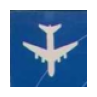

In [6]:
image, label = train_dataset[0]
image, label = val_dataset[0]

print(label, unique_labels[label])

imshow_torch(image, figsize=(1, 1))


In [7]:
classifier = MobileNetV3Classifier('runs_players_take/07/best.pt', ['down', 'left', 'right', 'sky', 'up'])

['down', 'down', 'down', 'left', 'left', 'left', 'left', 'right', 'right', 'right', 'right', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'up', 'up', 'up']
['down', 'down', 'down', 'left', 'left', 'left', 'left', 'right', 'right', 'right', 'right', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'up', 'up', 'up']


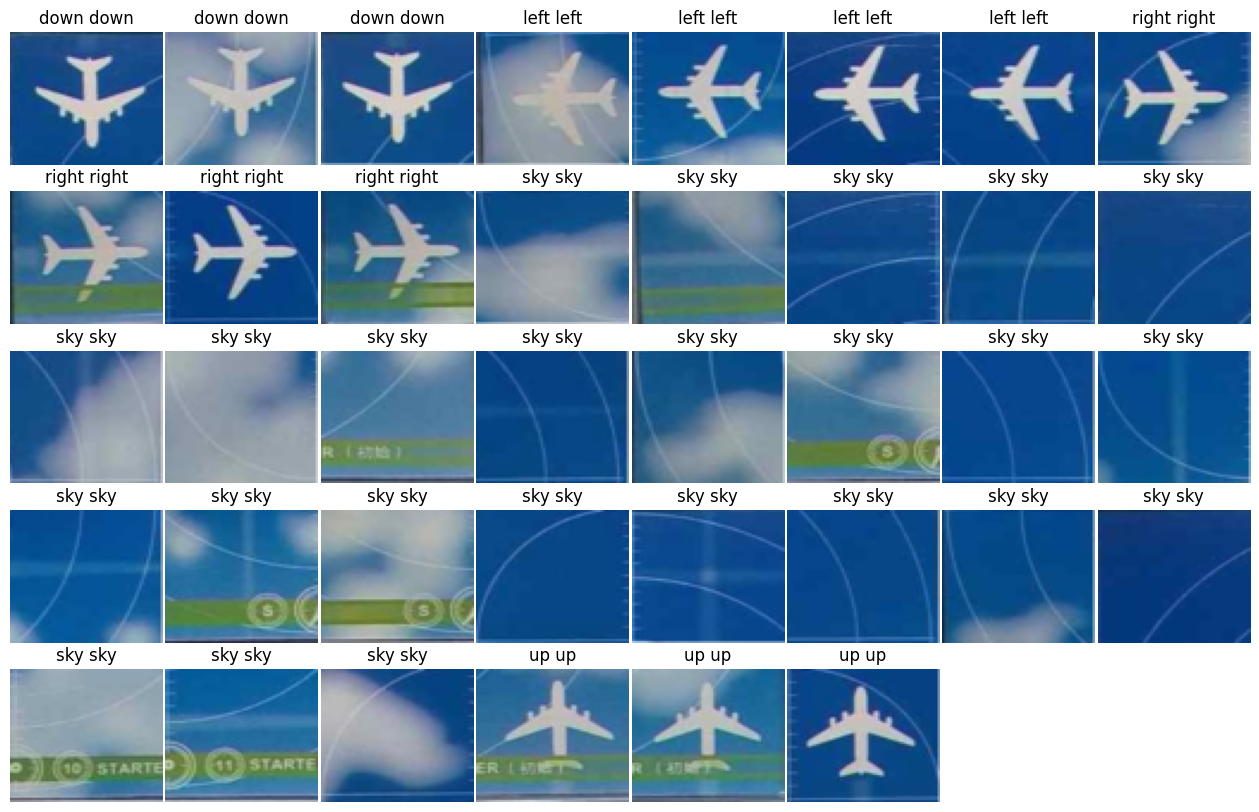

In [10]:
images, np_images, labels = [], [], []
for i, (image, label) in enumerate(val_dataset):
    np_image = image.numpy().transpose((1, 2, 0)).copy()
    np_image *= 255
    np_image = np_image.round().astype(np.uint8)
    
    images.append(image)
    np_images.append(np_image)
    labels.append(label)

labels = list(map(unique_labels.__getitem__, labels))
preds = classifier.predict(np_images)

print(labels)
print(preds)

imshow_torch_batch(images, [f'{l} {p}' for l, p in zip(labels, preds)])

# for image in images:
#     imshow_torch(image, figsize=(1, 1))
    

In [9]:


image, label = val_dataset[1]
np_image = image.numpy().transpose((1, 2, 0))
np_image *= 255
np_image = np_image.round().astype(np.uint8)

classifier.predict([np_image])

['down']